In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

#Import excel file into pandas dataframe

In [19]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/All_Ext_OPs-Jan-Jun2015-Anon.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data.head(5)
#all_data.describe()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/All_Ext_OPs-Jan-Jun2015-Anon.xlsx


,Centre_ID,Linac_Manufacturer,Linac_Model,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments
0,2,Varian,2100CD,12,2015-01-02 07:50:58,Linacheck,-0.30,Database,NaN
1,2,Varian,600,14,2015-01-02 08:04:11,Linacheck,-0.25,Database,NaN
2,2,Varian,2100CD,16,2015-01-02 08:21:24,Linacheck,0.10,Database,NaN
3,2,Varian,600,13,2015-01-02 08:21:41,Linacheck,-1.70,Database,NaN
4,2,Varian,2100CD,17,2015-01-02 08:23:29,Linacheck,0.00,Database,NaN


#Calculate some stats & check data types

In [20]:
mean = np.mean(all_data['OP_Dif'])
sd = np.std(all_data['OP_Dif'])
all_data.describe()
#all_data.dtypes

#all_data.groupby(['Type'])['Energy'].nunique().reset_index() # number of unique dates = number of visits

,Centre_ID,Linac_ID,OP_Dif
count,4920.000000,4920.000000,4920.000000
mean,2.895935,19.039024,-0.117135
std,1.727215,10.992656,2.615628
min,1.000000,1.000000,-147.646242
25%,2.000000,10.000000,-0.600000
50%,2.000000,18.000000,-0.033333
75%,4.000000,27.000000,0.480000
max,6.000000,39.000000,17.910000


#Make some quick graphs

### Plot of each centres distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07F8FA30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x08EAC670>]], dtype=object)

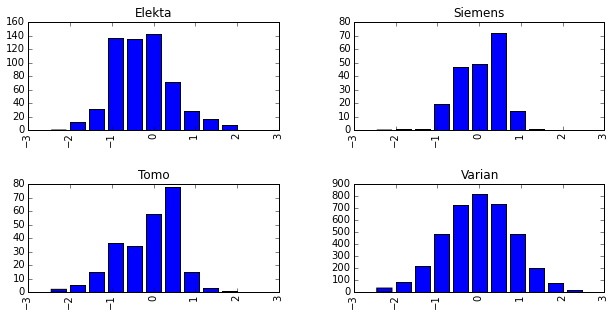

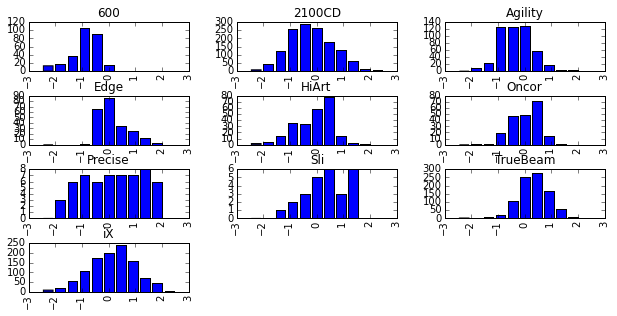

In [22]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('-2.5')
range_upper = Decimal('2.5')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

#simple auto plot in a grid
all_data['OP_Dif'].hist(by=all_data['Linac_Manufacturer'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
all_data['OP_Dif'].hist(by=all_data['Linac_Model'], normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)
#all_data['OP Dif (%)'].hist(normed=False, bins=11, range=(-2.5,2.5), rwidth=0.8)

#Histograms

##Ideally make into a function and feed data frame, title, filename

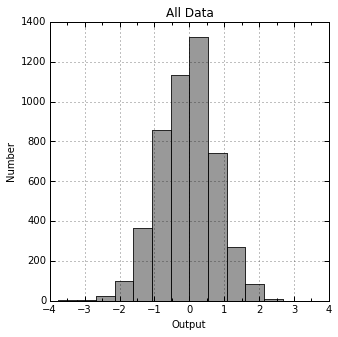

In [23]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('All Data')
plt.xlabel("Output")
plt.ylabel("Number")
#plt.xlim(-3.2, +3.2)
#plt.ylim(0, 60)

all_data['OP_Dif'].hist(bins=14, range=(-3.75, 3.75), normed=False,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = all_data['OP_Dif'].mean()
sd = all_data['OP_Dif'].std()

x = np.linspace(-3.75, 3.75, 100) # add normal distibution fit
#plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Hist_NHS.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [24]:
print('Skew: ', all_data['OP_Dif'].skew())
print('SEM: ', all_data['OP_Dif'].sem())
print('Mean: ', all_data['OP_Dif'].mean())
print('SD: ', all_data['OP_Dif'].std())

from scipy import stats
print('Skew Test: ', stats.skewtest(all_data['OP_Dif']))
print('Norm Test: ', stats.mstats.normaltest(all_data['OP_Dif']))


Skew:  -41.3715417324
SEM:  0.037290086889
Mean:  -0.117134665112
SD:  2.61562781269
Skew Test:  (-108.33680843094966, 0.0)


MaskError: Cannot alter the masked element.

#Plot of All Audits

In [25]:
# Calculate rolling SD of 20 values

all_data_datesort = all_data.sort(['Date'], ascending=True)

all_data_datesort['SD_Prev100'] = np.nan
all_data_datesort['SD_Prev100'] = pd.rolling_std(all_data_datesort['OP_Dif'],window=200)

all_data_datesort.tail()


,Centre_ID,Linac_Manufacturer,Linac_Model,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,SD_Prev100
1876,2,Varian,2100CD,17,2015-06-30 15:34:12,Linacheck,1.000000,Database,NaN,0.741054
1877,2,Varian,2100CD,15,2015-06-30 15:43:42,Linacheck,-0.400000,Database,NaN,0.740921
1878,2,Varian,2100CD,10,2015-06-30 19:08:38,Farmer Chamber in Water,-0.781194,Database,NaN,0.742619
3535,1,Tomo,HiArt,4,2015-07-01 00:00:00,Linacheck,-1.120000,Paper,Manually Transcribed,0.737949
3157,1,Elekta,Agility,1,2015-07-01 00:00:00,Linacheck,-1.000000,Paper,Manually Transcribed,0.732980


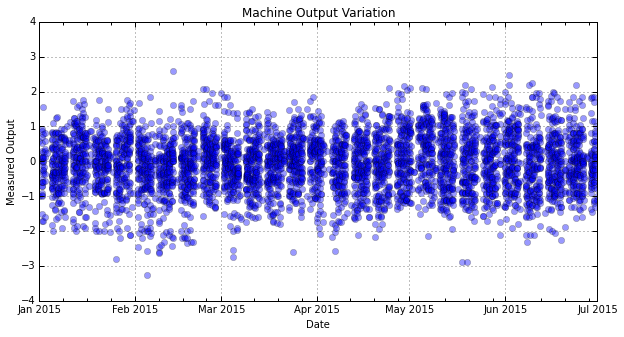

In [31]:
m = all_data_datesort

pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('Machine Output Variation')
plt.xlabel("Date")
plt.ylabel("Measured Output")
plt.ylim(-4, 4)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

#x=np.arange(1,m['OP_Dif'].count()+1)
x=m['Date']
y=m['OP_Dif']

plt.plot_date(x, y, alpha=0.4)
#yerr=(m['OPError']*m['OPRatio'])/100

ysd=m['SD_Prev100']

#plt.errorbar(x, y, yerr=yerr, ecolor='black')
#axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
#axes2.yaxis.tick_right()
#axes2.yaxis.set_label_position('right')
#plt.ylim(0, 2)
#plt.ylabel("SD (Previous 100)")
#line2=axes2.plot(x,ysd, color='orange', linewidth=2)

#plt.savefig('NPL_Paper_Plots/NPL_kV_All_SD_NHS.png', bbox_inches='tight', dpi=300)

##Want to change the colour for a centre to make it clearer? Loop through each and give a colour? or create seperate sets fo data to plot?

In [13]:
df3 = kv_data.copy()
df3.groupby('Region')
df3.mean()


Group               4.379310
Energy            154.448276
BeamQualRatio       0.999615
BeamQualError       2.384615
OPRatio             1.002103
OPError             0.606897
IntercompRatio      0.999792
IntercompError      0.400000
dtype: float64

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

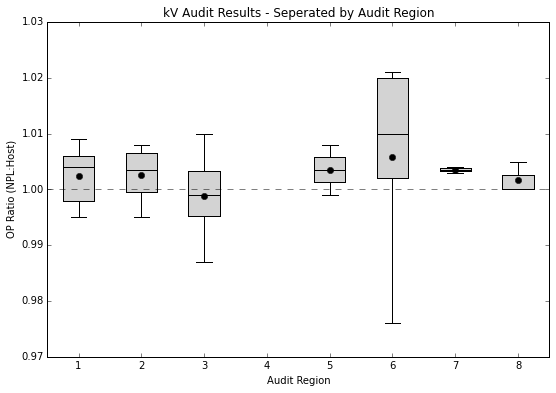

In [97]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

#m = mv_data_datesort

g1 = k.loc[kv_data_datesort['Group']==1, ['OPRatio']]
g2 = k.loc[kv_data_datesort['Group']==2, ['OPRatio']]
g3 = k.loc[kv_data_datesort['Group']==3, ['OPRatio']]
g4 = k.loc[kv_data_datesort['Group']==4, ['OPRatio']]
g5 = k.loc[kv_data_datesort['Group']==6, ['OPRatio']]
g6 = k.loc[kv_data_datesort['Group']==7, ['OPRatio']]
g7 = k.loc[kv_data_datesort['Group']==8, ['OPRatio']]
g8 = k.loc[kv_data_datesort['Group']==9, ['OPRatio']]

grouped=[g1,g2,g3,g4,g5,g6,g7,g8] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
plt.plot([-1,10],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('kV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit Region")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)


Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

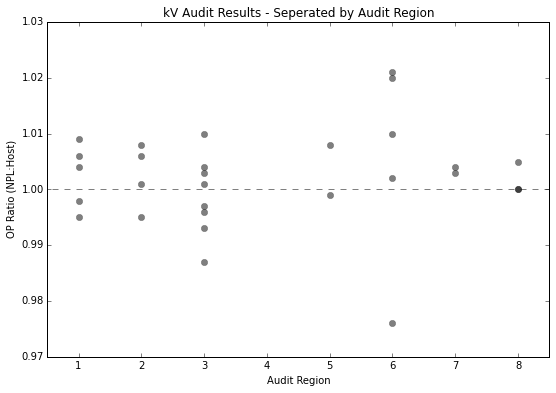

In [92]:
fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8])

one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

plt.xlim(0.5,8.5)
plt.ylim(0.97,1.03)
plt.title('kV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit Region")
plt.ylabel("OP Ratio (NPL:Host)")

##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='grey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_Scat_NHS.png', bbox_inches='tight', dpi=300)

   #Split data into 2 year intervals

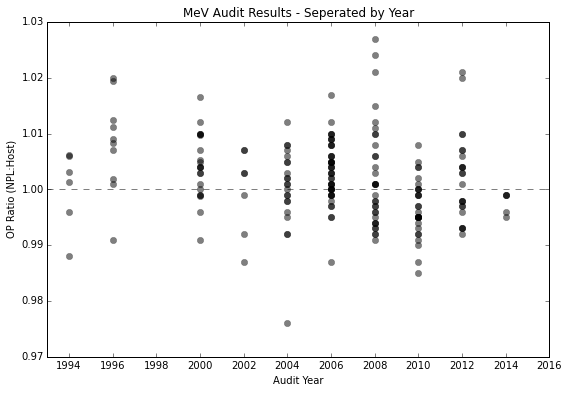

In [23]:
#create different sets of data containing 2 year intervals

d = nhs_data

y1 = d[(d['Date'] > '1994-01-01') & (d['Date'] < '1996-01-01')].copy()
y2 = d[(d['Date'] > '1996-01-01') & (d['Date'] < '1998-01-01')].copy()
y3 = d[(d['Date'] > '1998-01-01') & (d['Date'] < '2000-01-01')].copy()
y4 = d[(d['Date'] > '2000-01-01') & (d['Date'] < '2002-01-01')].copy()
y5 = d[(d['Date'] > '2002-01-01') & (d['Date'] < '2004-01-01')].copy()
y6 = d[(d['Date'] > '2004-01-01') & (d['Date'] < '2006-01-01')].copy()
y7 = d[(d['Date'] > '2006-01-01') & (d['Date'] < '2008-01-01')].copy()
y8 = d[(d['Date'] > '2008-01-01') & (d['Date'] < '2010-01-01')].copy()
y9 = d[(d['Date'] > '2010-01-01') & (d['Date'] < '2012-01-01')].copy()
y10 = d[(d['Date'] > '2012-01-01') & (d['Date'] < '2014-01-01')].copy()
y11 = d[(d['Date'] > '2014-01-01') & (d['Date'] < '2016-01-01')].copy()

#y1['GroupYear'] = 1
#y2['GroupYear'] = 2
#y3['GroupYear'] = 3
#y4['GroupYear'] = 4
#y5['GroupYear'] = 5
#y6['GroupYear'] = 6
#y7['GroupYear'] = 7
#y8['GroupYear'] = 8
#y9['GroupYear'] = 9
#y10['GroupYear'] = 10
#y11['GroupYear'] = 11

y1 = y1['OPRatio']
y2 = y2['OPRatio']
y3 = y3['OPRatio']
y4 = y4['OPRatio']
y5 = y5['OPRatio']
y6 = y6['OPRatio']
y7 = y7['OPRatio']
y8 = y8['OPRatio']
y9 = y9['OPRatio']
y10 = y10['OPRatio']
y11 = y11['OPRatio']

grouped_year=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticks([1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016])

one = plt.plot([0,3000],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped_year)):
    #print(i)
    scat = plt.plot(np.linspace(2*i+1994,2*i+1994,len(grouped_year[i])), grouped_year[i], u'o', color='black', alpha=0.5, linewidth=2)

#for i in range(0, len(grouped_year)):
#    print(np.linspace(i+1, i+1, len(grouped_year[i])))

#plt.xlim(0.5,11.5)
plt.xlim(1993, 2016)
plt.ylim(0.97,1.03)
plt.title('MeV Audit Results - Seperated by Year')
plt.xlabel("Audit Year")
plt.ylabel("OP Ratio (NPL:Host)")

#plt.savefig('NPL_Paper_Plots/NPL_kV_Years_Scat_NHS.png', bbox_inches='tight', dpi=300)


In [21]:
nhs_data.groupby('Type').describe()


BeamQualError  BeamQualRatio      Energy      Group  \
Type                                                              
MV   count   8.100000e+01      81.000000   81.000000  81.000000   
     mean    1.870370e-01       0.998920    8.629630   3.888889   
     std     2.204793e-02       0.005326    3.783003   2.765863   
     min     1.500000e-01       0.985000    4.000000   1.000000   
     25%     1.500000e-01       0.995000    6.000000   1.000000   
     50%     2.000000e-01       0.998700    6.000000   3.000000   
     75%     2.000000e-01       1.002000   10.000000   6.000000   
     max     2.000000e-01       1.012000   25.000000   9.000000   
MeV  count   2.400000e+01      61.000000   94.000000  94.000000   
     mean    2.000000e-01      -0.045410   11.436170   4.159574   
     std     2.197056e-09       0.081559    4.693987   2.974093   
     min     2.000000e-01      -0.280000    4.000000   1.000000   
     25%     2.000000e-01      -0.090000    8.000000   1.250000   
     50%     2.000000e-01      -0.050000   12.000000   3.000000   
     75%     2.000000e-01       0.000000   15.000000   7.000000   
     max     2.000000e-01       0.140000   22.000000   9.000000   
kV   count   2.600000e+01      26.000000   29.000000  29.000000   
     mean    2.384615e+00       0.999615  154.448276   4.379310   
     std     9.829313e-01       0.048669   82.535095   2.833647   
     min     2.000000e+00       0.873000   50.000000   1.000000   
     25%     2.000000e+00       0.982500   85.000000   2.000000   
     50%     2.000000e+00       1.002500  135.000000   3.000000   
     75%     2.000000e+00       1.023750  220.000000   7.000000   
     max     5.000000e+00       1.077000  300.000000   9.000000   

            IntercompError  IntercompRatio    OPError    OPRatio  
Type                                                              
MV   count    8.000000e+01       80.000000  81.000000  81.000000  
     mean     4.000000e-01        0.999049   0.177778   1.000463  
     std      1.161521e-08        0.007169   0.041079   0.006755  
     min      4.000000e-01        0.958000   0.100000   0.987000  
     25%      4.000000e-01        0.997000   0.200000   0.995000  
     50%      4.000000e-01        1.000000   0.200000   1.000000  
     75%      4.000000e-01        1.002250   0.200000   1.005000  
     max      4.000000e-01        1.010900   0.200000   1.019900  
MeV  count    6.700000e+01       67.000000  94.000000  94.000000  
     mean     4.000000e-01        1.000716   0.225532   1.002547  
     std      1.270775e-08        0.005178   0.084161   0.007437  
     min      4.000000e-01        0.987000   0.200000   0.985000  
     25%      4.000000e-01        0.997000   0.200000   0.998000  
     50%      4.000000e-01        1.001000   0.200000   1.002000  
     75%      4.000000e-01        1.005000   0.200000   1.007000  
     max      4.000000e-01        1.013000   0.500000   1.027000  
kV   count    2.400000e+01       24.000000  29.000000  29.000000  
     mean     4.000000e-01        0.999792   0.606897   1.002103  
     std      0.000000e+00        0.005150   0.037139   0.008793  
     min      4.000000e-01        0.992000   0.600000   0.976000  
     25%      4.000000e-01        0.995750   0.600000   0.998000  
     50%      4.000000e-01        1.000000   0.600000   1.003000  
     75%      4.000000e-01        1.002250   0.600000   1.006000  
     max      4.000000e-01        1.011000   0.800000   1.021000

#MeV Low/High Energy

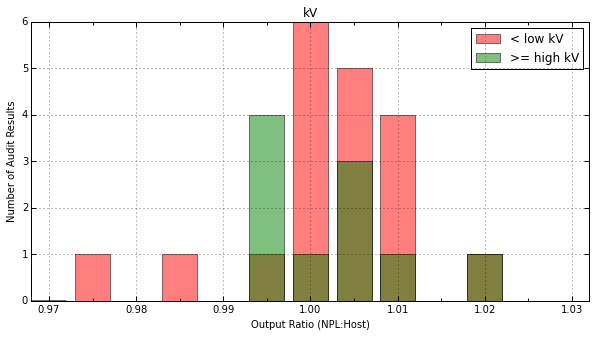

In [107]:
#d = nhs_data

#md = mv_data
#ed = mev_data
#kd = kv_data

esplit = 9
elow = ed[ed['Energy'] <= esplit].copy() #separate each of mev/mv/kv into 'low' and 'high' energy
ehigh = ed[ed['Energy'] > esplit].copy()

msplit = 6
mlow = md[md['Energy'] <= msplit].copy()
mhigh = md[md['Energy'] > msplit].copy()

ksplit = 160
klow = kd[kd['Energy'] <= ksplit].copy()
khigh = kd[kd['Energy'] > ksplit].copy()

#grouped_year=[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11] # this should be able to be done a bit easier without splitting it all up first.

to_plot1 = klow
to_plot2 = khigh

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('kV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Number of Audit Results")
plt.xlim(0.968, 1.032)
#plt.ylim(0, 60)

to_plot1['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=False,
                               facecolor = 'red', alpha = 0.5, ax=axes, rwidth=0.8, label='< low kV')
to_plot2['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=False,
                               facecolor = 'green', alpha = 0.5, ax=axes, rwidth=0.8, label='>= high kV')

#single plot with separated bars
#plt.hist([to_plot1['OPRatio'],to_plot2['OPRatio']], label=['low','high'],histtype='bar', alpha=0.7)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')
plt.legend(loc='best')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Energy_Split_NHS.png', bbox_inches='tight', dpi=300)

##Get some stats for low/high energies
Have recorded values in excel spreadsheet for low/high/all


In [106]:
m.describe()


,Group,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,SD_Prev20
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,80.000000,8.000000e+01,62.000000
mean,3.888889,8.629630,0.998920,0.187037,1.000463,0.177778,0.999049,4.000000e-01,0.006155
std,2.765863,3.783003,0.005326,0.022048,0.006755,0.041079,0.007169,1.161521e-08,0.001685
min,1.000000,4.000000,0.985000,0.150000,0.987000,0.100000,0.958000,4.000000e-01,0.003354
25%,1.000000,6.000000,0.995000,0.150000,0.995000,0.200000,0.997000,4.000000e-01,0.004557
50%,3.000000,6.000000,0.998700,0.200000,1.000000,0.200000,1.000000,4.000000e-01,0.006494
75%,6.000000,10.000000,1.002000,0.200000,1.005000,0.200000,1.002250,4.000000e-01,0.007376
max,9.000000,25.000000,1.012000,0.200000,1.019900,0.200000,1.010900,4.000000e-01,0.008734


##Plot Beam Quality

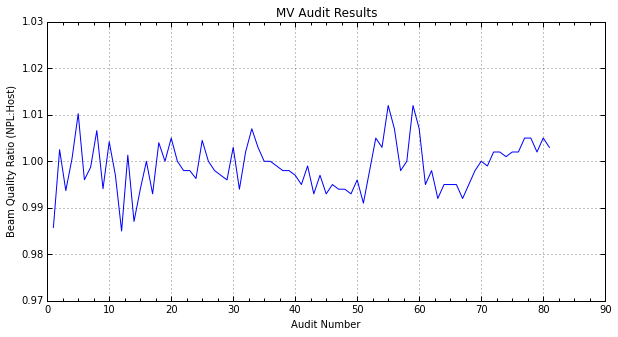

In [166]:
#m = mv_data_datesort

m = mv_data_datesort     # to allow shorter references to dataframes
e = mev_data_datesort
k = kv_data_datesort

fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('MV Audit Results')
plt.xlabel("Audit Number")
plt.ylabel("Beam Quality Ratio (NPL:Host)")
plt.ylim(0.97, 1.03)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

q = m

x=np.arange(1,q['BeamQualRatio'].count()+1)
y=q['BeamQualRatio']

plt.plot(x,y)
#plt.errorbar(x, y, yerr=yerr, ecolor='black')
#axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
#axes2.yaxis.tick_right()
#axes2.yaxis.set_label_position('right')
#plt.ylim(0, 0.012)
#plt.ylabel("SD (Previous 20)")
#line2=axes2.plot(x,ysd, color='orange')

#plt.savefig('NPL_Paper_Plots/NPL_kV_All_SD_NHS.png', bbox_inches='tight', dpi=300)


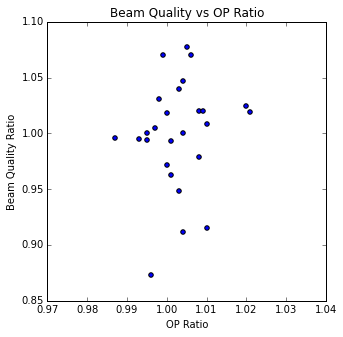

In [150]:
d=k

plt.figure(figsize=(5,5))

plt.scatter(d['OPRatio'], d['BeamQualRatio'])
#plt.scatter(d['OPRatio'], d['IntercompRatio'])

plt.title('Beam Quality vs OP Ratio')
plt.xlabel("OP Ratio")
plt.ylabel("Beam Quality Ratio")


##No real trends observed in Beam Qual
###What does the spread look like?

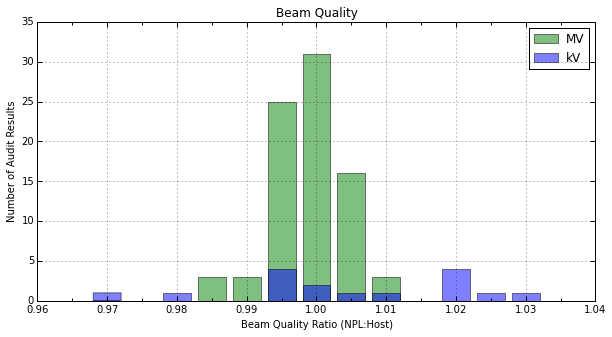

In [180]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('Beam Quality')
plt.xlabel("Beam Quality Ratio (NPL:Host)")
plt.ylabel("Number of Audit Results")
#plt.xlim(0.968, 1.032)
#plt.ylim(0, 60)

#e['BeamQualRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=False,
#                               facecolor = 'red', alpha = 0.5, ax=axes, rwidth=0.8, label='MeV')
m['BeamQualRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=False,
                               facecolor = 'green', alpha = 0.5, ax=axes, rwidth=0.8, label='MV')
k['BeamQualRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=False,
                               facecolor = 'blue', alpha = 0.5, ax=axes, rwidth=0.8, label='kV')

#single plot with separated bars
#plt.hist([to_plot1['OPRatio'],to_plot2['OPRatio']], label=['low','high'],histtype='bar', alpha=0.7)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')
plt.legend(loc='best')

plt.savefig('NPL_Paper_Plots/NPL_kV+MV_BQrato_NHS.png', bbox_inches='tight', dpi=300)